# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [3]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Task: Normalize the data to have pixel values between 0 and 1
# Your code here
# Normalize the data (scale pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

2025-02-28 16:31:52.727611: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize 5 random images from the training set with their labels.

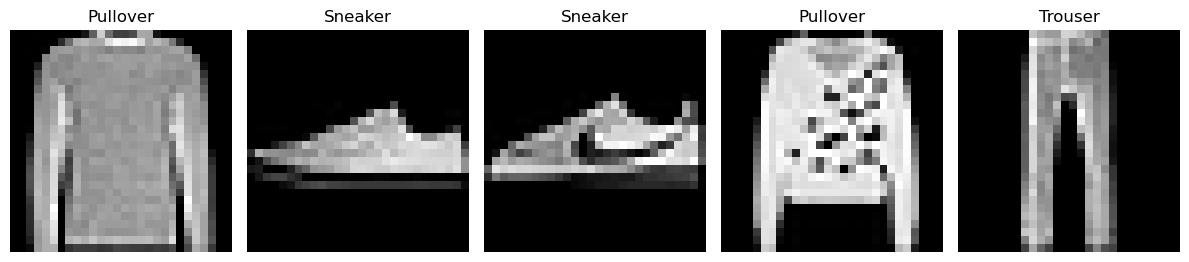

In [7]:
# Your code here for visualization
import numpy as np

random_indices = np.random.choice(len(x_train), 5, replace=False)

# Plot 5 random images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()

Reshape the data to include a channel dimension and confirm the new shape.

In [9]:
# Task: Reshape x_train and x_test to include the channel dimension
# Your code here
# Reshape to include a channel dimension (for CNN input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Confirm new shape
print("New shape of x_train:", x_train.shape)  # Expected: (60000, 28, 28, 1)
print("New shape of x_test:", x_test.shape)    # Expected: (10000, 28, 28, 1)

New shape of x_train: (60000, 28, 28, 1)
New shape of x_test: (10000, 28, 28, 1)


## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Task: Build your model here
model = Sequential([
    # Your layers here
    # First Convolutional Layer
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2,2)),  # Reduce feature map size
    
    # Second Convolutional Layer
    Conv2D(64, (3,3), activation='relu'),  # 64 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2,2)),  # Further downsampling
    
    # Flatten Layer
    Flatten(),  # Converts 2D feature maps to 1D vector
    
    # Fully Connected Layers
    Dense(128, activation='relu'),  # Dense layer with 128 neurons
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile your model with an appropriate optimizer, loss function, and metric.

In [15]:
# Task: Compile your model
# Your code here
model.compile(
    optimizer='adam',  # Adaptive learning rate optimization
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Print Model Summary (for verification)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [17]:
# Task: Train the model and store the training history in a variable
# Your code here
history = model.fit(
    x_train, y_train,  # Training data
    epochs=10,  # Number of training iterations
    batch_size=32,  # Process 32 images at a time
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1  # Show training progress
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.7098 - loss: 0.8064 - val_accuracy: 0.8618 - val_loss: 0.3823
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.8541 - loss: 0.4063 - val_accuracy: 0.8817 - val_loss: 0.3246
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.8755 - loss: 0.3488 - val_accuracy: 0.8931 - val_loss: 0.2869
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.8878 - loss: 0.3080 - val_accuracy: 0.8972 - val_loss: 0.2748
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.8962 - loss: 0.2835 - val_accuracy: 0.9020 - val_loss: 0.2664
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9022 - loss: 0.2681 - val_accuracy: 0.9065 - val_loss: 0.2562
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9110 - loss: 0.2384 - val_accuracy: 0.9103 - val_loss: 0.2464
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.9161 -

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [19]:
# Task: Evaluate the model on the test data
# Your code here
# Evaluate the Model on the Test Set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print Test Accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9070 - loss: 0.2690
Test Accuracy: 0.9060


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


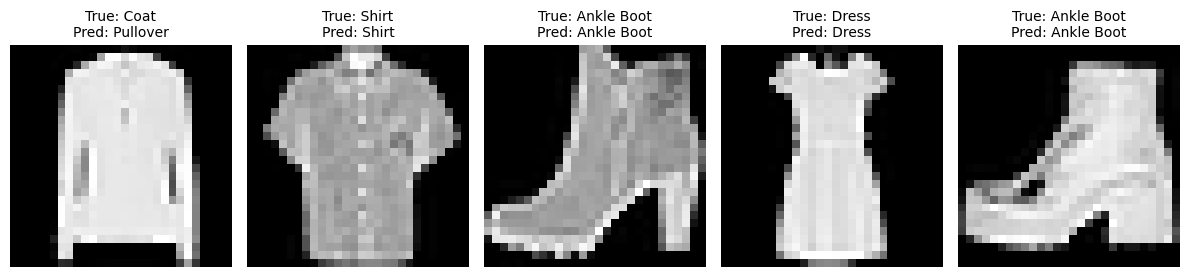

In [26]:
# Task: Use model.predict() and display predictions
# Your code here to display images with predicted and actual labels
# Make Predictions on Test Set
y_pred = model.predict(x_test)  # Model outputs probabilities for each class
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Class names for Fashion MNIST
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Select 5 random test images
random_indices = np.random.choice(len(x_test), 5, replace=False)

# Plot 5 random test images with predicted and true labels
plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")  # Reshape to 2D for display
    true_label = class_names[y_test[idx]]
    predicted_label = class_names[y_pred_labels[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


Construct a confusion matrix to visualize how well your model performed across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Figure size 1000x800 with 0 Axes>

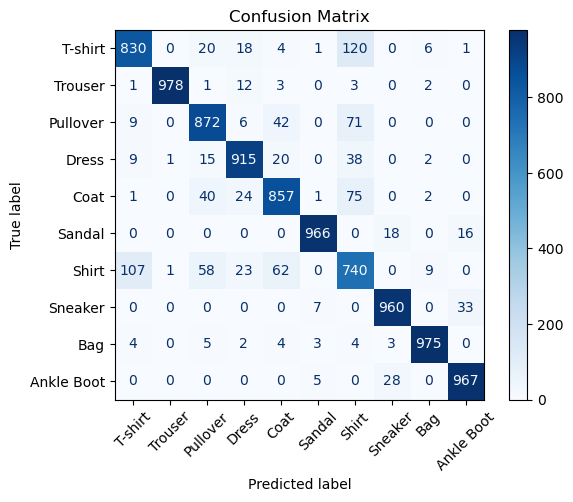

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Your code here
# Make Predictions on Test Set
y_pred = model.predict(x_test)  
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
# Display the confusion matrix
# Your code here
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
])
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()